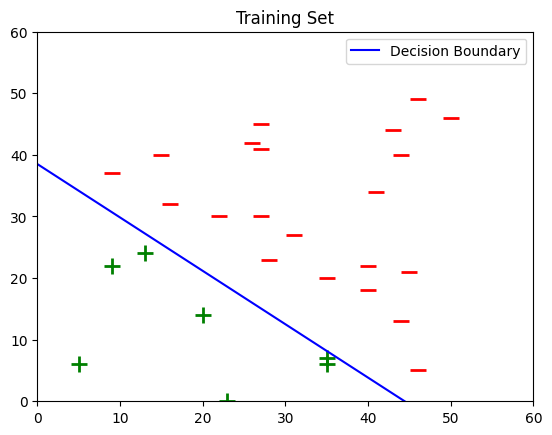

In [16]:
import matplotlib.pyplot as plt
import random


# Perceptron Class
class Perceptron:
  def __init__(self, num_inputs=3, weights=[1,1,1]):
    self.num_inputs = num_inputs
    self.weights = weights
    
  def weighted_sum(self, inputs):
    return sum([self.weights[i] * inputs[i] for i in range(self.num_inputs)])
  
  def activation(self, weighted_sum):
    return 1 if weighted_sum >= 0 else -1
    
  def training(self, training_set, max_epochs=500, learning_rate=1):
    for epoch in range(max_epochs):
      total_error = 0
      for inputs in training_set:
        prediction = self.activation(self.weighted_sum(inputs))
        actual = training_set[inputs]
        error = actual - prediction
        total_error += abs(error)
        for i in range(self.num_inputs):
          self.weights[i] = self.weights[i] + learning_rate * error * inputs[i]
      if total_error == 0:
        return
   

# Function to generate training set
def generate_training_set(num_points):
	x_coordinates = [random.randint(0, 50) for i in range(num_points)]
	y_coordinates = [random.randint(0, 50) for i in range(num_points)]
	training_set = dict()
	for x, y in zip(x_coordinates, y_coordinates):
		if x <= 45-y:
			training_set[(x,y,1)] = 1
		elif x > 45-y:
			training_set[(x,y,1)] = -1
	return training_set


# Initialize training set
training_set = generate_training_set(30)
x_plus = []
y_plus = []
x_minus = []
y_minus = []
for data in training_set:
	if training_set[data] == 1:
		x_plus.append(data[0])
		y_plus.append(data[1])
	elif training_set[data] == -1:
		x_minus.append(data[0])
		y_minus.append(data[1])


# Initialize and train the perceptron
perceptron = Perceptron()
perceptron.training(training_set)
w = perceptron.weights


# Plot the decision boundary
x_vals = list(range(0, 60))
y_vals = [-(w[0]*x + w[2])/w[1] for x in x_vals]
plt.scatter(x_plus, y_plus, marker = '+', c = 'green', s = 128, linewidth = 2)
plt.scatter(x_minus, y_minus, marker = '_', c = 'red', s = 128, linewidth = 2)
plt.xlim(0,60)
plt.ylim(0,60)
plt.title('Training Set')
plt.plot(x_vals, y_vals, label="Decision Boundary", color='blue')
plt.legend()
plt.show()